In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 

In [2]:
sns.set_theme(style='white')  # 图形主题
rcParams['pdf.fonttype'] = 42 # True font
rcParams['font.size'] =  8  
rcParams['grid.linewidth'] =  0.5 
rcParams['lines.color'] = 'b' 
rcParams['lines.linewidth'] = 1 
rcParams['lines.markersize'] = 3
rcParams['lines.markeredgewidth'] = 0 # set Marker with no edgelines
rcParams['axes.linewidth'] = 0.5
rcParams['axes.titlesize'] = 12
rcParams['axes.labelsize'] = 8
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['legend.title_fontsize'] = 8

In [3]:
GM_GpC_df = pd.read_table("/data1/LLR/GpC/figure1/process/map_frag_methylation.bed",
                          header=None)

In [4]:
GM_GpC_df.columns = ['chrom', 'start', 'end', 'read_id', 'strand', 'fragment', 'acc', 'Msegment']

In [5]:
GM_CpG_df = pd.read_table("/data1/LLR/GpC/figure1/process/map_frag_CpG_methylation_segments.bed",
                          header=None)

In [6]:
GM_CpG_df = GM_CpG_df.loc[GM_CpG_df[8].isna()]
GM_CpG_df = GM_CpG_df[[0,1,2,3,4,5,6,7]]

In [7]:
GM_CpG_df.columns = ['chrom', 'start', 'end', 'read_id', 'strand', 'fragment', 'Msegment', 'UnMsegment']

In [8]:
GM_CpG_df.loc[GM_CpG_df.read_id=='R1Gkon_gm0603']

,chrom,start,end,read_id,strand,fragment,Msegment,UnMsegment
21282271,chr2,208283649,208284989,R1Gkon_gm0603,+,1,208284309-208284606,0
21282273,chr2,229910895,229912377,R1Gkon_gm0603,+,3,0,0
21282274,chr2,157342991,157345177,R1Gkon_gm0603,-,4,0,0
21282275,chr2,157342991,157345177,R1Gkon_gm0603,-,4,0,0
21282277,chr2,157385782,157386515,R1Gkon_gm0603,-,6,0,0
21282279,chr2,229919981,229920353,R1Gkon_gm0603,-,8,0,"229920069-229920102,229920234-229920333"


In [ ]:
chr2:20400000-20700000

In [9]:
select_region_GC = GM_GpC_df.loc[(GM_GpC_df.start >= 20400000) & (GM_GpC_df.end <= 20700000) & (GM_GpC_df.chrom == "chr2")]
select_region_GC.reset_index(drop = True, inplace = True)
select_region_GC

,chrom,start,end,read_id,strand,fragment,acc,Msegment
0,chr2,20669132,20669993,R1019U_gm0603,+,3,False,0
1,chr2,20513203,20513310,R101ND_gm0603,+,5,False,0
2,chr2,20417790,20417834,R101Yx_gm0603,+,2,False,0
3,chr2,20656503,20656975,R101w8_gm0603,-,3,False,0
4,chr2,20658456,20658774,R102m5_gm0603,-,2,False,0
...,...,...,...,...,...,...,...,...
16135,chr2,20488268,20489021,RzvTU_gm0603,-,2,False,0
16136,chr2,20538253,20538382,RzwWS_gm0603,-,3,False,0
16137,chr2,20451261,20452769,Rzwqb_gm0603,+,10,True,20452190-20452290
16138,chr2,20519767,20519855,RzxQm_gm0603,+,5,False,0


In [10]:
select_region_CG = GM_CpG_df.loc[(GM_CpG_df.start >= 20400000) & (GM_CpG_df.end <= 20700000) & (GM_CpG_df.chrom == "chr2")]
select_region_CG.reset_index(drop = True, inplace = True)
select_region_CG

,chrom,start,end,read_id,strand,fragment,Msegment,UnMsegment
0,chr2,20669132,20669993,R1019U_gm0603,+,3,20669954-20669979,"20669164-20669287,20669525-20669926"
1,chr2,20513203,20513310,R101ND_gm0603,+,5,0,20513271-20513271
2,chr2,20417790,20417834,R101Yx_gm0603,+,2,0,20417807-20417807
3,chr2,20656503,20656975,R101w8_gm0603,-,3,0,20656635-20656668
4,chr2,20658456,20658774,R102m5_gm0603,-,2,0,0
...,...,...,...,...,...,...,...,...
14452,chr2,20557449,20559079,Rzugr_gm0603,+,3,20558488-20558652,20558183-20558353
14453,chr2,20488268,20489021,RzvTU_gm0603,-,2,0,20488572-20488583
14454,chr2,20538253,20538382,RzwWS_gm0603,-,3,20538302-20538306,0
14455,chr2,20451261,20452769,Rzwqb_gm0603,+,10,0,20452423-20452453


In [11]:
filter = []
group_GC = select_region_GC.groupby("read_id")
for id, gdf in group_GC:
    if len(gdf) >= 3:
        filter.append(id)

In [12]:
select_region_GC = select_region_GC.loc[select_region_GC['read_id'].isin(filter)]

In [13]:
filter = []
group_CG = select_region_CG.groupby("read_id")
for id, gdf in group_CG:
    if len(gdf) >= 3:
        filter.append(id)

In [14]:
select_region_CG = select_region_CG.loc[select_region_CG['read_id'].isin(filter)]

In [15]:
overlap_id = list(set(select_region_GC['read_id'].tolist()).intersection(set(select_region_CG['read_id'].tolist())))

In [16]:
select_region_GC = select_region_GC.loc[select_region_GC['read_id'].isin(overlap_id)]
select_region_CG = select_region_CG.loc[select_region_CG['read_id'].isin(overlap_id)]

In [17]:
select_region_CG

,chrom,start,end,read_id,strand,fragment,Msegment,UnMsegment
18,chr2,20526643,20527187,R10B7K_gm0603,-,2,0,0
19,chr2,20516567,20517228,R10B7K_gm0603,+,5,0,"20516633-20516666,20517146-20517178"
20,chr2,20508868,20509351,R10B7K_gm0603,-,6,20508917-20508921,0
21,chr2,20478450,20479391,R10B7K_gm0603,-,7,0,0
22,chr2,20570448,20571624,R10BLI_gm0603,+,1,"20570469-20570502,20570987-20571155,20571453-2...",0
...,...,...,...,...,...,...,...,...
14436,chr2,20436537,20436838,Rzmot_gm0603,+,7,20436705-20436791,0
14437,chr2,20442816,20443696,Rzmot_gm0603,-,8,20442863-20442896,20443076-20443100
14450,chr2,20607393,20607602,Rzugr_gm0603,+,1,0,0
14451,chr2,20442422,20442638,Rzugr_gm0603,-,2,0,0


In [18]:
GC_group = select_region_GC.groupby(select_region_GC.read_id)
readID_dict1 = {}
for readID, gdf in GC_group:
    readID_dict1[readID] = gdf.reset_index(drop = True)  

sort_dict = {}
for readid, frame in readID_dict1.items():
    sort_dict[readid] = min(frame["start"])
sort_list = sorted(sort_dict.items(), key = lambda kv:(kv[1], kv[0]))

In [19]:
len(select_region_CG['read_id'].unique())

980

<Figure size 640x480 with 0 Axes>

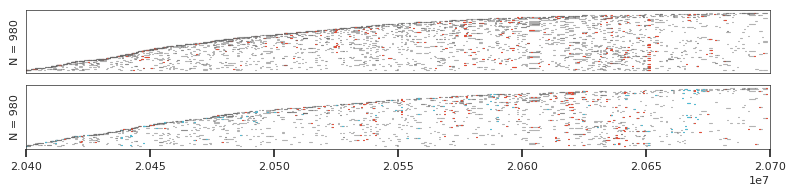

In [23]:
plt.subplots_adjust(hspace=0.1)
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True) 
fig.figure.set_size_inches(8,2)

for i in sort_list:
    row1 = select_region_GC.loc[select_region_GC.read_id == i[0]]
    for index,row in row1.iterrows():
            # axes[1].plot([row["f_start"]],row["ID"], '.', color = "dimgrey")
            # axes[1].plot([row["f_end"]],row["ID"], '.', color = "dimgrey")
        axes[0].plot([row["start"],row["end"]], [row["read_id"], row["read_id"]], linestyle='-', color = "dimgray", linewidth=0.8, alpha=0.5)
        if row['Msegment'] != '0':
            for i in row['Msegment'].split(','):
                fstart = int(i.split('-')[0])
                fend = int(i.split('-')[1])
                axes[0].plot([fstart,fend], [row["read_id"], row["read_id"]], linestyle='-', color = "#E64B35", linewidth=0.8)
            
    row2 = select_region_CG.loc[select_region_CG.read_id == i[0]]
    for index,row in row2.iterrows():
        axes[1].plot([row["start"],row["end"]], [row["read_id"], row["read_id"]], linestyle='-', color = "dimgray", linewidth=0.8, alpha=0.5)
        if row['Msegment'] != '0':
            for i in row['Msegment'].split(','):
                fstart = int(i.split('-')[0])
                fend = int(i.split('-')[1])
                axes[1].plot([fstart,fend], [row["read_id"], row["read_id"]], linestyle='-', color = "#E64B35", linewidth=0.8)
        if row['UnMsegment'] != '0':
            for i in row['UnMsegment'].split(','):
                fstart = int(i.split('-')[0])
                fend = int(i.split('-')[1])
                axes[1].plot([fstart,fend], [row["read_id"], row["read_id"]], linestyle='-', color = "#4DBBD5", linewidth=0.8)
        
axes[0].tick_params(labelleft=False, left=False)
axes[0].set_ylabel(f"N = {len(select_region_GC['read_id'].unique())}")
axes[1].set_ylabel(f"N = {len(select_region_CG['read_id'].unique())}")
axes[1].tick_params(labelleft=False, left=False, bottom=True)
plt.xlim( 20400000, 20700000)
# plt.xlim( 157360000, 157370000)

plt.tight_layout()
plt.savefig("/data1/LLR/GpC/figure1/figure/single_0625.pdf")

In [ ]:
chr2:20400000-20700000

<Figure size 640x480 with 0 Axes>

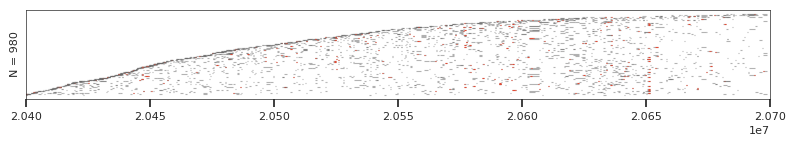

In [24]:
plt.subplots_adjust(hspace=0.1)
fig, axes = plt.subplots(nrows=1,ncols=1,sharex=True) 
fig.figure.set_size_inches(8,1.5)

for i in sort_list:
    row1 = select_region_GC.loc[select_region_GC.read_id == i[0]]
    for index,row in row1.iterrows():
            # axes[1].plot([row["f_start"]],row["ID"], '.', color = "dimgrey")
            # axes[1].plot([row["f_end"]],row["ID"], '.', color = "dimgrey")
        axes.plot([row["start"],row["end"]], [row["read_id"], row["read_id"]],
                  linestyle='-', color = "dimgray", linewidth=0.8, alpha=0.5, solid_capstyle='butt')
        if row['Msegment'] != '0':
            for i in row['Msegment'].split(','):
                fstart = int(i.split('-')[0])
                fend = int(i.split('-')[1])
                axes.plot([fstart,fend], [row["read_id"], row["read_id"]],
                          linestyle='-', color = "#E64B35", linewidth=0.8, solid_capstyle='butt')
        
axes.tick_params(labelleft=False, left=False, bottom=True)
axes.set_ylabel(f"N = {len(select_region_GC['read_id'].unique())}")
plt.xlim( 20400000, 20700000)
# plt.xlim( 157360000, 157370000)

plt.tight_layout()
plt.savefig("/data1/LLR/GpC/figure1/figure/single_sub1_0625.pdf")

<Figure size 640x480 with 0 Axes>

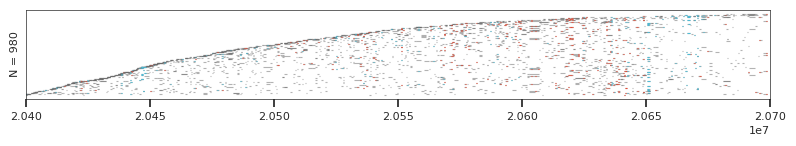

In [25]:
plt.subplots_adjust(hspace=0.1)
fig, axes = plt.subplots(nrows=1,ncols=1,sharex=True) 
fig.figure.set_size_inches(8,1.5)

for i in sort_list:
            
    row2 = select_region_CG.loc[select_region_CG.read_id == i[0]]
    for index,row in row2.iterrows():
        axes.plot([row["start"],row["end"]], [row["read_id"], row["read_id"]],
                  linestyle='-', color = "dimgray", linewidth=0.8, alpha=0.5, solid_capstyle='butt')
        if row['Msegment'] != '0':
            for i in row['Msegment'].split(','):
                fstart = int(i.split('-')[0])
                fend = int(i.split('-')[1])
                axes.plot([fstart,fend], [row["read_id"], row["read_id"]],
                          linestyle='-', color = "#E64B35", linewidth=0.8, solid_capstyle='butt')
        if row['UnMsegment'] != '0':
            for i in row['UnMsegment'].split(','):
                fstart = int(i.split('-')[0])
                fend = int(i.split('-')[1])
                axes.plot([fstart,fend], [row["read_id"], row["read_id"]], 
                          linestyle='-', color = "#4DBBD5", linewidth=0.8, solid_capstyle='butt')
        
axes.set_ylabel(f"N = {len(select_region_CG['read_id'].unique())}")
axes.tick_params(labelleft=False, left=False, bottom=True)
plt.xlim( 20400000, 20700000)
# plt.xlim( 157360000, 157370000)

plt.tight_layout()
plt.savefig("/data1/LLR/GpC/figure1/figure/single_sub2_0625.pdf")

In [27]:
%load_ext rpy2.ipython

In [28]:
%%R -i select_region_GC
head(select_region_GC)

   chrom    start      end       read_id strand fragment   acc Msegment
19  chr2 20526643 20527187 R10B7K_gm0603      -        2 FALSE        0
20  chr2 20516567 20517228 R10B7K_gm0603      +        5 FALSE        0
21  chr2 20508868 20509351 R10B7K_gm0603      -        6 FALSE        0
22  chr2 20478450 20479391 R10B7K_gm0603      -        7 FALSE        0
23  chr2 20570448 20571624 R10BLI_gm0603      +        1 FALSE        0
24  chr2 20623710 20624010 R10BLI_gm0603      +        6 FALSE        0


In [29]:
%%R -i select_region_CG
head(select_region_CG)

   chrom    start      end       read_id strand fragment
18  chr2 20526643 20527187 R10B7K_gm0603      -        2
19  chr2 20516567 20517228 R10B7K_gm0603      +        5
20  chr2 20508868 20509351 R10B7K_gm0603      -        6
21  chr2 20478450 20479391 R10B7K_gm0603      -        7
22  chr2 20570448 20571624 R10BLI_gm0603      +        1
23  chr2 20623710 20624010 R10BLI_gm0603      +        6
                                                Msegment
18                                                     0
19                                                     0
20                                     20508917-20508921
21                                                     0
22 20570469-20570502,20570987-20571155,20571453-20571574
23                                     20623735-20623876
                            UnMsegment
18                                   0
19 20516633-20516666,20517146-20517178
20                                   0
21                                   0
22     

In [ ]:
test = np.array(sort_list)

In [ ]:
select_region_GC

In [30]:
n = 0
r_select_GCdf = pd.DataFrame()
testN=0
for i in sort_list:
    tmp_all = select_region_GC.loc[select_region_GC['read_id']==i[0]].copy()
    tmp_base = tmp_all[['start', 'end']].copy()
    tmp_base.columns = ['xmin', 'xmax']
    tmp_base['ymin'] = n
    tmp_base['ymax'] = n + 1
    tmp_base['color'] = '#e7e6e5'

    
    tmp_df_list = []
    tmp_acc_start_list = []
    tmp_acc_end_list = []
    tmp_ymin = []
    tmp_ymax = []
    tmp_color = []
    if len(tmp_all.loc[tmp_all['Msegment']!='0']) !=0:
        tmp_acc = tmp_all.loc[tmp_all['Msegment']!='0']
        for tmp_index, tmp_row in tmp_acc.iterrows():
            for tmp_acc_region in tmp_row['Msegment'].split(','):
                testN+=1
                tmp_acc_start = int(tmp_acc_region.split('-')[0])
                tmp_acc_end = int(tmp_acc_region.split('-')[1])
                tmp_acc_start_list.append(tmp_acc_start)
                tmp_acc_end_list.append(tmp_acc_end)
                tmp_ymin.append(n)
                tmp_ymax.append(n+1)
                tmp_color.append("#E64B35")
    tmp_df_list.append(tmp_acc_start_list)
    tmp_df_list.append(tmp_acc_end_list)
    tmp_df_list.append(tmp_ymin)
    tmp_df_list.append(tmp_ymax)
    tmp_df_list.append(tmp_color)
    tmp_df = pd.DataFrame(tmp_df_list).T
    tmp_df.columns=['xmin', 'xmax', 'ymin', 'ymax', 'color']

    tmp_concat_df = pd.concat([tmp_base, tmp_df])
    r_select_GCdf = pd.concat([r_select_GCdf, tmp_concat_df])
    n += 1
    

In [31]:
select_region_CG

,chrom,start,end,read_id,strand,fragment,Msegment,UnMsegment
18,chr2,20526643,20527187,R10B7K_gm0603,-,2,0,0
19,chr2,20516567,20517228,R10B7K_gm0603,+,5,0,"20516633-20516666,20517146-20517178"
20,chr2,20508868,20509351,R10B7K_gm0603,-,6,20508917-20508921,0
21,chr2,20478450,20479391,R10B7K_gm0603,-,7,0,0
22,chr2,20570448,20571624,R10BLI_gm0603,+,1,"20570469-20570502,20570987-20571155,20571453-2...",0
...,...,...,...,...,...,...,...,...
14436,chr2,20436537,20436838,Rzmot_gm0603,+,7,20436705-20436791,0
14437,chr2,20442816,20443696,Rzmot_gm0603,-,8,20442863-20442896,20443076-20443100
14450,chr2,20607393,20607602,Rzugr_gm0603,+,1,0,0
14451,chr2,20442422,20442638,Rzugr_gm0603,-,2,0,0


In [32]:
n = 0
r_select_CGdf = pd.DataFrame()
for i in sort_list:
    tmp_all = select_region_CG.loc[select_region_CG['read_id']==i[0]].copy()
    tmp_base = tmp_all[['start', 'end']].copy()
    tmp_base.columns = ['xmin', 'xmax']
    tmp_base['ymin'] = n
    tmp_base['ymax'] = n + 1
    tmp_base['color'] = '#e7e6e5'

    
    tmp_df_list = []
    tmp_HighM_start_list = []
    tmp_HighM_end_list = []
    tmp_ymin = []
    tmp_ymax = []
    tmp_color = []
    if len(tmp_all.loc[tmp_all['Msegment']!='0']) !=0:
        tmp_HighM = tmp_all.loc[tmp_all['Msegment']!='0']
        for tmp_index, tmp_row in tmp_HighM.iterrows():
            for tmp_HighM_region in tmp_row['Msegment'].split(','):
                tmp_HighM_start = int(tmp_HighM_region.split('-')[0])
                tmp_HighM_end = int(tmp_HighM_region.split('-')[1])
                tmp_HighM_start_list.append(tmp_HighM_start)
                tmp_HighM_end_list.append(tmp_HighM_end)
                tmp_ymin.append(n)
                tmp_ymax.append(n+1)
                tmp_color.append("#f29b80")
    tmp_df_list.append(tmp_HighM_start_list)
    tmp_df_list.append(tmp_HighM_end_list)
    tmp_df_list.append(tmp_ymin)
    tmp_df_list.append(tmp_ymax)
    tmp_df_list.append(tmp_color)
    tmp_df = pd.DataFrame(tmp_df_list).T
    tmp_df.columns=['xmin', 'xmax', 'ymin', 'ymax', 'color']
    tmp_concat_df = pd.concat([tmp_base, tmp_df])
    r_select_CGdf = pd.concat([r_select_CGdf, tmp_concat_df])

    tmp_df_list = []
    tmp_LowM_start_list = []
    tmp_LowM_end_list = []
    tmp_ymin = []
    tmp_ymax = []
    tmp_color = []
    if len(tmp_all.loc[tmp_all['UnMsegment']!='0']) !=0:
        tmp_LowM = tmp_all.loc[tmp_all['UnMsegment']!='0']
        for tmp_index, tmp_row in tmp_LowM.iterrows():
            for tmp_LowM_region in tmp_row['UnMsegment'].split(','):
                tmp_LowM_start = int(tmp_LowM_region.split('-')[0])
                tmp_LowM_end = int(tmp_LowM_region.split('-')[1])
                tmp_LowM_start_list.append(tmp_LowM_start)
                tmp_LowM_end_list.append(tmp_LowM_end)
                tmp_ymin.append(n)
                tmp_ymax.append(n+1)
                tmp_color.append("#50bad5")

    tmp_df_list.append(tmp_LowM_start_list)
    tmp_df_list.append(tmp_LowM_end_list)
    tmp_df_list.append(tmp_ymin)
    tmp_df_list.append(tmp_ymax)
    tmp_df_list.append(tmp_color)
    tmp_df = pd.DataFrame(tmp_df_list).T
    tmp_df.columns=['xmin', 'xmax', 'ymin', 'ymax', 'color']
    r_select_CGdf = pd.concat([r_select_CGdf, tmp_df])
    n += 1

In [33]:
r_select_GCdf = r_select_GCdf.reset_index(drop=True)
r_select_CGdf = r_select_CGdf.reset_index(drop=True)

In [34]:
new_data_types = {'xmin': 'int',
                  'xmax': 'int',
                  'ymin': 'int',
                  'ymax': 'int'}

In [35]:
r_select_GCdf = r_select_GCdf.astype(new_data_types)
r_select_CGdf = r_select_CGdf.astype(new_data_types)

In [36]:
%%R
library(dplyr)
library(ggplot2)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [37]:
%%R -i r_select_GCdf
head(r_select_GCdf)

      xmin     xmax ymin ymax   color
0 20400112 20400501    0    1 #e7e6e5
1 20632575 20633750    0    1 #e7e6e5
2 20641037 20641486    0    1 #e7e6e5
3 20423165 20423361    0    1 #e7e6e5
4 20608165 20608350    0    1 #e7e6e5
5 20544504 20544991    0    1 #e7e6e5


In [38]:
%%R -i r_select_CGdf
head(r_select_CGdf)

      xmin     xmax ymin ymax   color
0 20400112 20400501    0    1 #e7e6e5
1 20632575 20633750    0    1 #e7e6e5
2 20641037 20641486    0    1 #e7e6e5
3 20423165 20423361    0    1 #e7e6e5
4 20608165 20608350    0    1 #e7e6e5
5 20544504 20544991    0    1 #e7e6e5


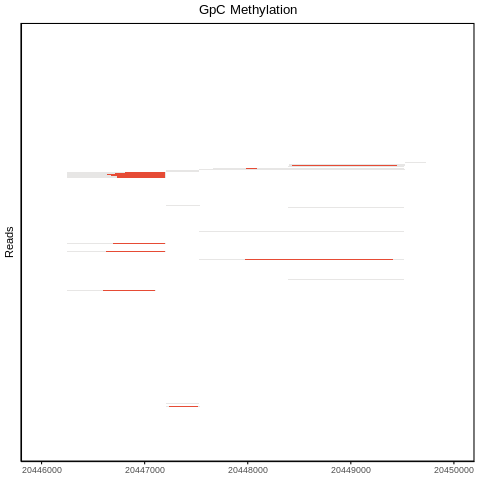

In [42]:
%%R
library(ggplot2)

# # 初始化一个空的数据框，用于存储所有长方形的坐标
# all_rectangles <- data.frame(xmin = numeric(), xmax = numeric(), ymin = numeric(), ymax = numeric())

# # 循环10次，每次创建一个新的长方形并添加到数据框中
# for (i in 1:10) {
#   # 计算长方形的坐标
#   xmin <- i
#   xmax <- i + 2
#   ymin <- i
#   ymax <- i + 1
  
#   # 创建一个临时数据框存储当前长方形的坐标
#   temp_rectangle <- data.frame(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax)
  
#   # 将当前长方形的坐标添加到累积的数据框中
#   all_rectangles <- rbind(all_rectangles, temp_rectangle)
# }
xmin <- r_select_GCdf$xmin
xmax <- r_select_GCdf$xmax
ymin <- r_select_GCdf$ymin
ymax <- r_select_GCdf$ymax
color <- r_select_GCdf$color
all_rectangles <- data.frame(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax)

p <- ggplot( ) +
  geom_rect(data=all_rectangles, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            color = "white", fill = color, size=0) +
  scale_fill_identity() +
  # scale_x_continuous(limits = c(157360000, 157370000)) +
  scale_x_continuous(limits = c(20446000, 20450000)) +
  scale_y_continuous(limits = c(0, 500)) +
  theme_minimal() +
  labs( y = 'Reads', title = 'GpC Methylation') +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.ticks = element_line(color = "black"),
        axis.text.y = element_blank(),  # 去掉y轴刻度标签
        axis.ticks.y = element_blank(),
        panel.background = element_blank(),
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),
        plot.title = element_text(hjust = 0.5)) 
ggsave("/data1/LLR/GpC/figure1/figure/single_R_0625.pdf", p, height=6, width=6, device = "pdf")
p

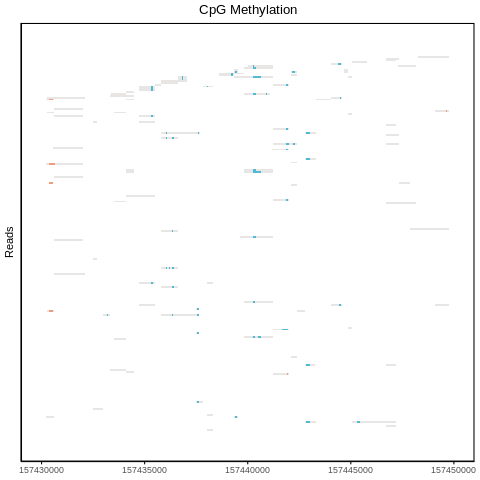

In [449]:
%%R
library(ggplot2)

# # 初始化一个空的数据框，用于存储所有长方形的坐标
# all_rectangles <- data.frame(xmin = numeric(), xmax = numeric(), ymin = numeric(), ymax = numeric())

# # 循环10次，每次创建一个新的长方形并添加到数据框中
# for (i in 1:10) {
#   # 计算长方形的坐标
#   xmin <- i
#   xmax <- i + 2
#   ymin <- i
#   ymax <- i + 1
  
#   # 创建一个临时数据框存储当前长方形的坐标
#   temp_rectangle <- data.frame(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax)
  
#   # 将当前长方形的坐标添加到累积的数据框中
#   all_rectangles <- rbind(all_rectangles, temp_rectangle)
# }
xmin <- r_select_CGdf$xmin
xmax <- r_select_CGdf$xmax
ymin <- r_select_CGdf$ymin
ymax <- r_select_CGdf$ymax
color <- r_select_CGdf$color
all_rectangles <- data.frame(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax)

p <- ggplot( ) +
  geom_rect(data=all_rectangles, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            color = "white", fill = color, size=0) +
  scale_fill_identity() +
  # scale_x_continuous(limits = c(157360000, 157370000)) +
  scale_x_continuous(limits = c(157430000, 157450000)) +
  scale_y_continuous(limits = c(0, 215)) +
  theme_minimal() +
  labs( y = 'Reads', title = 'CpG Methylation') +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.ticks = element_line(color = "black"),
        axis.text.y = element_blank(),  # 去掉y轴刻度标签
        axis.ticks.y = element_blank(),
        panel.background = element_blank(),
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),
        plot.title = element_text(hjust = 0.5)) 
ggsave("/data1/LLR/GpC/figure1/figure/single_R_CG_candidate1.pdf", p, height=1.5, width=6, device = "pdf")
p